In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-poster')

In [3]:
df = pd.read_csv('sub/data/us_daily.csv')

In [4]:
df.shape

(15, 8)

In [5]:
df.head()

,date,states,positive,negative,posNeg,pending,death,total
0,20200304,14,118,748,866,103,NaN,969
1,20200305,24,176,971,1147,197,NaN,1344
2,20200306,36,223,1617,1840,458,NaN,2298
3,20200307,51,341,1863,2204,602,NaN,2806
4,20200308,51,417,2437,2854,347,NaN,3201


In [6]:
df['date'] = df['date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

In [7]:
max(df['date'])

Timestamp('2020-03-18 00:00:00')

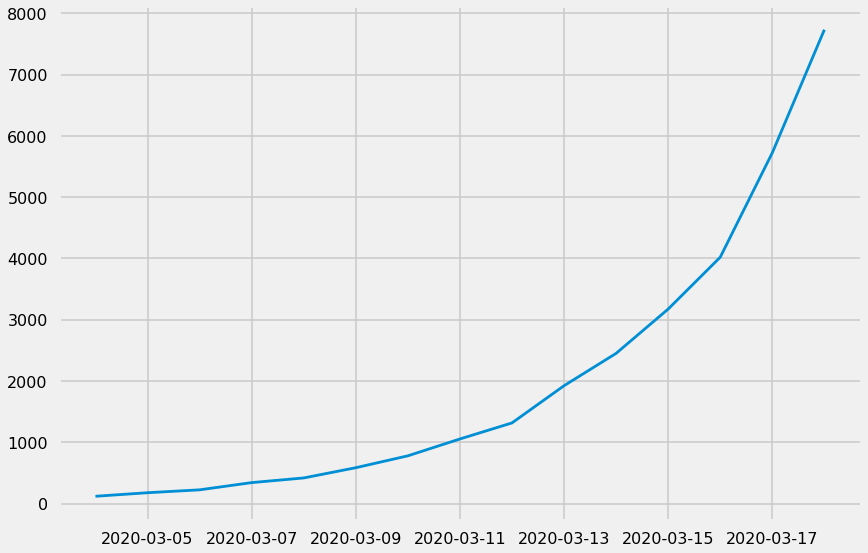

In [8]:
plt.plot(df['date'], df['positive'])